# Seattle & Boston AirBNB Data

Key Steps for Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

* Prepare data:
    * Gather necessary data to answer your questions
    * Handle categorical and missing data
    * Provide insight into the methods you chose and why you chose them
* Analyze, Model, and Visualize
    * Provide a clear connection between your business questions and how the data answers them.
    
4) Communicate your business insights:
    * Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    * Create a blog post to share your questions and insights with a non-technical audience

The deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

### Business Understanding

Utilizing both the Seattle and Boston AirBNB listing datasets will provide a deeper understanding regarding specific factors that influence rental prices; for instance, location and amenities and most importantly their magnitude of influence on price. 

The following four questions will provide further insights:
* What are the top 10 amenities for Seattle and Boston?
* What are the top 10 revenue generating neighbourhoods for Seattle and Boston?
* What are the top 10 amenities ranked by their importance to price?

### Data Understanding

* Boston AirBNB dataset has 3585 rows, 95 columns.
* Seattle AirBNB dataset has 3818 rows, 92 columns.

### Prepare Data

The preparation of the data includes cleaning, removing columns/rows with missing value.

### Data Modeling



### Evaluate the Results

Results are published in the following Medium post...

## Importing Libaries & Data

In [1]:
# Visualization & Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn 
import sklearn as sk 
from sklearn import metrics
import sklearn.metrics as mtr
from scipy.stats import randint
import statsmodels.api as stats
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold 
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Dismiss the warnings and allow all columns to be seen
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## EDA

### Seattle

In [2]:
#Importing Seattle dataframe
seattle_df = pd.read_csv('datasets/Seattle/seattle_listings.csv')
seattle_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
# Viewing datatypes for each column
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
# Viewing basic stats for numerical data
seattle_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
seattle_df['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [6]:
#Lambda function to remove "$" and ",", as well as converting dtype from object to float
seattle_df[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'
           ]] = seattle_df[['price', 'weekly_price', 'monthly_price', 'security_deposit', 
                            'cleaning_fee', 'extra_people']].apply(lambda x: x.str.replace('[$,]', '').astype(float))

In [7]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

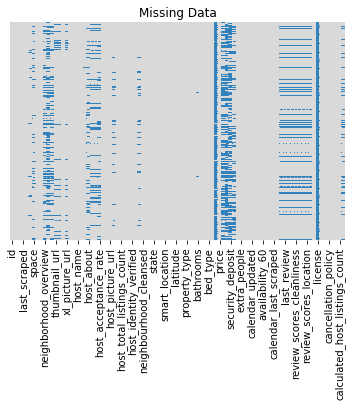

In [8]:
#Visual Showing Missing Values
sns.heatmap(seattle_df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [9]:
# Dropping rows that will not be the focus of this project
seattle_df = seattle_df.drop(['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 
 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
 'medium_url', 'picture_url',	'xl_picture_url', 'host_url', 'host_name', 'host_since', 
 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications',  
 'market', 'smart_location', 'country_code', 'country', 'square_feet', 'license',
 'jurisdiction_names'], axis=1)
seattle_df.head()

,id,name,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,5177328,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,6.0,t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,16708587,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,2.0,t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,9851441,"Seattle, Washington, United States",NaN,NaN,NaN,f,Queen Anne,1.0,1.0,t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,650.0,2300.0,NaN,NaN,1,0.0,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,1452570,"Seattle, Washington, United States",within an hour,100%,NaN,f,Queen Anne,2.0,2.0,t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,NaN,700.0,125.0,6,15.0,1,1125,7 weeks ago,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [10]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   int64  
 3   host_location                     3810 non-null   object 
 4   host_response_time                3295 non-null   object 
 5   host_response_rate                3295 non-null   object 
 6   host_acceptance_rate              3045 non-null   object 
 7   host_is_superhost                 3816 non-null   object 
 8   host_neighbourhood                3518 non-null   object 
 9   host_listings_count               3816 non-null   float64
 10  host_total_listings_count         3816 non-null   float64
 11  host_has_profile_pic              3816 non-null   object 
 12  host_i

In [11]:
# Creating new DF with specific columns
clean_seattle_df=seattle_df[['host_response_rate', 'host_total_listings_count', 'neighbourhood', 
                            'beds', 'bedrooms', 'minimum_nights', 'maximum_nights', 
                            'number_of_reviews', 'price', 'state', 'amenities']].copy()
clean_seattle_df.head()

,host_response_rate,host_total_listings_count,neighbourhood,beds,bedrooms,minimum_nights,maximum_nights,number_of_reviews,price,state,amenities
0,96%,3.0,Queen Anne,1.0,1.0,1,365,207,85.0,WA,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,98%,6.0,Queen Anne,1.0,1.0,2,90,43,150.0,WA,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,67%,2.0,Queen Anne,7.0,5.0,4,30,20,975.0,WA,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,NaN,1.0,Queen Anne,2.0,0.0,1,1125,0,100.0,WA,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,100%,2.0,Queen Anne,3.0,3.0,1,1125,38,450.0,WA,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [12]:
clean_seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3295 non-null   object 
 1   host_total_listings_count  3816 non-null   float64
 2   neighbourhood              3402 non-null   object 
 3   beds                       3817 non-null   float64
 4   bedrooms                   3812 non-null   float64
 5   minimum_nights             3818 non-null   int64  
 6   maximum_nights             3818 non-null   int64  
 7   number_of_reviews          3818 non-null   int64  
 8   price                      3818 non-null   float64
 9   state                      3818 non-null   object 
 10  amenities                  3818 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 328.2+ KB


In [13]:
# Droping rows with NaNs
cleanest_seattle_df = clean_seattle_df.dropna(axis=0, how='any')
cleanest_seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         2927 non-null   object 
 1   host_total_listings_count  2927 non-null   float64
 2   neighbourhood              2927 non-null   object 
 3   beds                       2927 non-null   float64
 4   bedrooms                   2927 non-null   float64
 5   minimum_nights             2927 non-null   int64  
 6   maximum_nights             2927 non-null   int64  
 7   number_of_reviews          2927 non-null   int64  
 8   price                      2927 non-null   float64
 9   state                      2927 non-null   object 
 10  amenities                  2927 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 274.4+ KB


In [14]:
# Lamda function to remove "%", as well as converting dtype from object to integer
cleanest_seattle_df[[
    'host_response_rate']] = cleanest_seattle_df[[
    'host_response_rate']].apply(lambda x: x.str.replace('[%]', '').astype(int))

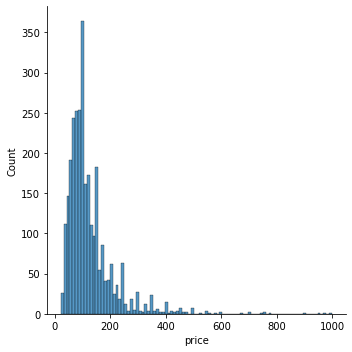

In [15]:
sns.displot(cleanest_seattle_df, x="price")

In [16]:
# Clean up amenities column
cleanest_seattle_df_amenities = cleanest_seattle_df['amenities'].apply(
    lambda x: [amenity.replace('"', "").replace("{", "").replace("}", "") 
               for amenity in x.split(",")])

In [17]:
#Creating MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_amenities = pd.DataFrame(mlb.fit_transform(
    cleanest_seattle_df_amenities), columns=mlb.classes_, index=cleanest_seattle_df_amenities.index)

# Sum of each amenity
sum_of_amenity=mlb_amenities.sum().sort_values(ascending=False)
print('There are {0} unique amenities.'.format(len(mlb_amenities.columns)))

There are 42 unique amenities.


### Question 1 (Seattle)

Text(17.75, 0.5, 'Count')

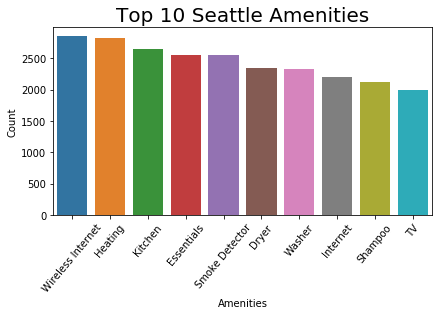

In [18]:
# Visual of the top 10 Seattle Amenities
sns.barplot(x=sum_of_amenity[:10].index, y=sum_of_amenity[:10].values)
plt.xticks(rotation=50)
plt.tight_layout()
plt.title('Top 10 Seattle Amenities', fontsize=20)
plt.xlabel("Amenities")
plt.ylabel("Count")

### Question 2 (Seattle)

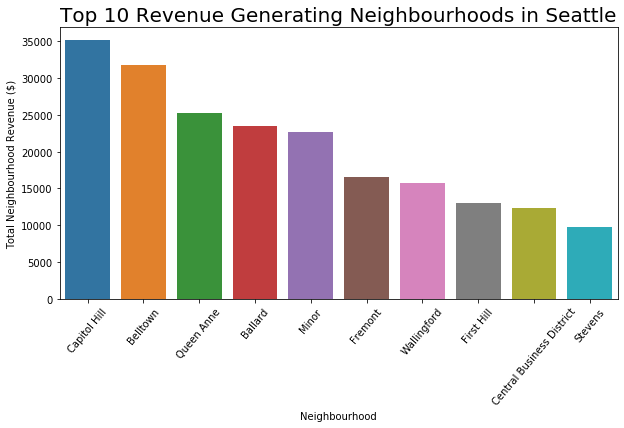

In [19]:
# Visual of the top 10 Revenue Generating Neighbourhoods in Seattle
neighbourhood_by_price = cleanest_seattle_df.groupby('neighbourhood').price.sum().sort_values(ascending=False)
neighbourhood_by_price = neighbourhood_by_price
plt.figure(figsize=(10,5))
sns.barplot(neighbourhood_by_price[:10].index, neighbourhood_by_price[:10].values)
plt.title('Top 10 Revenue Generating Neighbourhoods in Seattle', fontsize=20)
plt.ylabel('Total Neighbourhood Revenue ($)', fontsize=10)
plt.xlabel('Neighbourhood', fontsize=10)
plt.xticks(rotation=50)
plt.show()

### Boston

In [20]:
#Importing Boston dataframe
boston_df = pd.read_csv('datasets/Boston/Boston_listings.csv')
boston_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [21]:
# Viewing datatypes for each column
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [22]:
# Viewing basic stats for numerical data 
boston_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [23]:
boston_df['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [24]:
# Lamda function to remove "$" and ",", as well as converting dtype from object to float
boston_df[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'
           ]] = boston_df[['price', 'weekly_price', 'monthly_price', 'security_deposit', 
                            'cleaning_fee', 'extra_people']].apply(lambda x: x.str.replace('[$,]', '').astype(float))

In [25]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

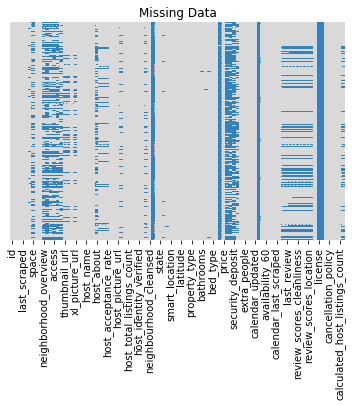

In [26]:
#Visual Showing Missing Values
sns.heatmap(boston_df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [27]:
# Dropping rows that will not be the focus of this project
boston_df = boston_df.drop(['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 
 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 
 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications',  
 'market', 'smart_location', 'country_code', 'country', 'square_feet', 'license',
 'jurisdiction_names'], axis=1)
boston_df.head()

,id,name,access,interaction,house_rules,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Sunny Bungalow in the City,"You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,Charming room in pet friendly apt,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1,1,t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,Mexican Folk Art Haven in Boston,"I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",16701,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,1,1,t,t,"Ardale St., Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,6031442,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,1,1,t,f,"Boston, MA, United States",NaN,Roslindale,NaN,Boston,MA,NaN,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,a week ago,NaN,6,16,26,98,2016-09-06,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,Come Home to Boston,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",15396970,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,1,1,t,t,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,42.284512,-71.136258,t,House,

In [28]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   int64  
 3   host_location                     3810 non-null   object 
 4   host_response_time                3295 non-null   object 
 5   host_response_rate                3295 non-null   object 
 6   host_acceptance_rate              3045 non-null   object 
 7   host_is_superhost                 3816 non-null   object 
 8   host_neighbourhood                3518 non-null   object 
 9   host_listings_count               3816 non-null   float64
 10  host_total_listings_count         3816 non-null   float64
 11  host_has_profile_pic              3816 non-null   object 
 12  host_i

In [29]:
# Creating new DF with specific columns
clean_boston_df=boston_df[['host_response_rate', 'host_total_listings_count', 'neighbourhood', 
                            'beds', 'bedrooms', 'minimum_nights', 'maximum_nights', 
                            'number_of_reviews', 'price', 'state', 'amenities']].copy()
clean_boston_df.head()

,host_response_rate,host_total_listings_count,neighbourhood,beds,bedrooms,minimum_nights,maximum_nights,number_of_reviews,price,state,amenities
0,NaN,1,Roslindale,3.0,2.0,2,1125,0,250.0,MA,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."
1,100%,1,Roslindale,1.0,1.0,2,15,36,65.0,MA,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
2,100%,1,Roslindale,1.0,1.0,3,45,41,65.0,MA,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
3,100%,1,NaN,2.0,1.0,1,1125,1,75.0,MA,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
4,100%,1,Roslindale,2.0,1.0,2,31,29,79.0,MA,"{Internet,""Wireless Internet"",""Air Conditionin..."


In [30]:
clean_boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3114 non-null   object 
 1   host_total_listings_count  3585 non-null   int64  
 2   neighbourhood              3042 non-null   object 
 3   beds                       3576 non-null   float64
 4   bedrooms                   3575 non-null   float64
 5   minimum_nights             3585 non-null   int64  
 6   maximum_nights             3585 non-null   int64  
 7   number_of_reviews          3585 non-null   int64  
 8   price                      3585 non-null   float64
 9   state                      3585 non-null   object 
 10  amenities                  3585 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 308.2+ KB


In [31]:
# Deleting rows with NaNs
cleanest_boston_df = clean_boston_df.dropna(axis=0, how='any')
cleanest_boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 1 to 3584
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         2614 non-null   object 
 1   host_total_listings_count  2614 non-null   int64  
 2   neighbourhood              2614 non-null   object 
 3   beds                       2614 non-null   float64
 4   bedrooms                   2614 non-null   float64
 5   minimum_nights             2614 non-null   int64  
 6   maximum_nights             2614 non-null   int64  
 7   number_of_reviews          2614 non-null   int64  
 8   price                      2614 non-null   float64
 9   state                      2614 non-null   object 
 10  amenities                  2614 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 245.1+ KB


In [32]:
# Lamda function to remove "%", as well as convert dtype object to integer
cleanest_boston_df[[
    'host_response_rate']] = cleanest_boston_df[[
    'host_response_rate']].apply(lambda x: x.str.replace('[%]', '').astype(int))

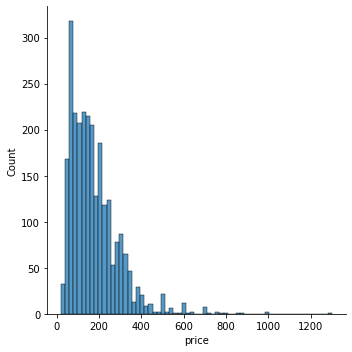

In [33]:
sns.displot(cleanest_boston_df, x="price")

In [34]:
# Clean up amenities column
cleanest_boston_df_amnities = cleanest_boston_df['amenities'].apply(
    lambda x: [amenity.replace('"', "").replace("{", "").replace("}", "") 
               for amenity in x.split(",")])

In [35]:
#Creating MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_amenities = pd.DataFrame(mlb.fit_transform(
    cleanest_boston_df_amnities), columns=mlb.classes_, index=cleanest_boston_df_amnities.index)

# Sum of each amenity
sum_of_amenity=mlb_amenities.sum().sort_values(ascending=False)
print('There are {0} unique amenities.'.format(len(mlb_amenities.columns)))

There are 46 unique amenities.


### Question 1 (Boston)

Text(17.75, 0.5, 'Count')

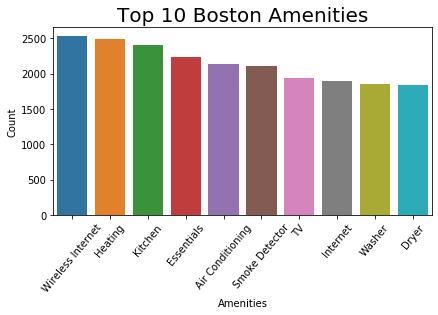

In [36]:
# Visual of the top 10 Boston Amenities
sns.barplot(x=sum_of_amenity[:10].index, y=sum_of_amenity[:10].values)
plt.xticks(rotation=50)
plt.tight_layout()
plt.title('Top 10 Boston Amenities', fontsize=20)
plt.xlabel("Amenities")
plt.ylabel("Count")

### Question 2 (Boston)

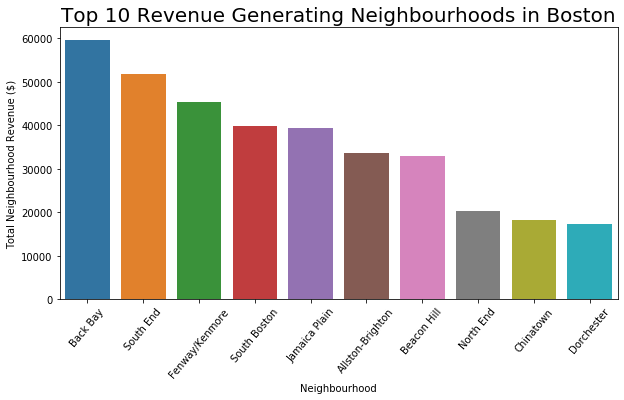

In [37]:
# Visual of the top 10 Revenue Generating Neighbourhoods in Boston
neighbourhood_by_price = cleanest_boston_df.groupby('neighbourhood').price.sum().sort_values(ascending=False)
neighbourhood_by_price = neighbourhood_by_price
plt.figure(figsize=(10,5))
sns.barplot(neighbourhood_by_price[:10].index, neighbourhood_by_price[:10].values)
plt.title('Top 10 Revenue Generating Neighbourhoods in Boston', fontsize=20)
plt.ylabel('Total Neighbourhood Revenue ($)', fontsize=10)
plt.xlabel('Neighbourhood', fontsize=10)
plt.xticks(rotation=50)
plt.show()

## Combining Both DataFrames

In [38]:
dfs = [cleanest_seattle_df, cleanest_boston_df]
df = pd.concat(dfs)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         5541 non-null   int64  
 1   host_total_listings_count  5541 non-null   float64
 2   neighbourhood              5541 non-null   object 
 3   beds                       5541 non-null   float64
 4   bedrooms                   5541 non-null   float64
 5   minimum_nights             5541 non-null   int64  
 6   maximum_nights             5541 non-null   int64  
 7   number_of_reviews          5541 non-null   int64  
 8   price                      5541 non-null   float64
 9   state                      5541 non-null   object 
 10  amenities                  5541 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 519.5+ KB


In [40]:
# Clean up amenities column
df_amenities = df['amenities'].apply(
    lambda x: [amenity.replace('"', "").replace("{", "").replace("}", "") 
               for amenity in x.split(",")])

In [41]:
#Creating MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_amenities = pd.DataFrame(mlb.fit_transform(
    df_amenities), columns=mlb.classes_, index=df_amenities.index)

# Sum of each amenity
sum_of_amenity=mlb_amenities.sum().sort_values(ascending=False)
print('There are {0} unique amenities.'.format(len(mlb_amenities.columns)))

There are 46 unique amenities.


### Question 1 (Seattle & Boston)

Text(17.875, 0.5, 'Count')

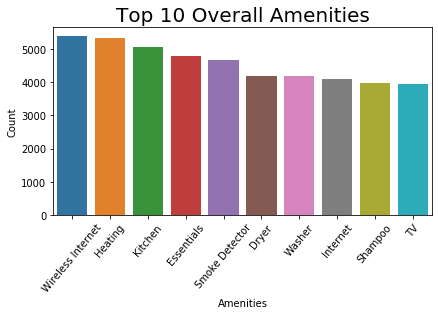

In [42]:
# Visual of the top 10 Overall Amenities
sns.barplot(x=sum_of_amenity[:10].index, y=sum_of_amenity[:10].values)
plt.xticks(rotation=50)
plt.tight_layout()
plt.title('Top 10 Overall Amenities', fontsize=20)
plt.xlabel("Amenities")
plt.ylabel("Count")

### Question 2 (Seattle & Boston)

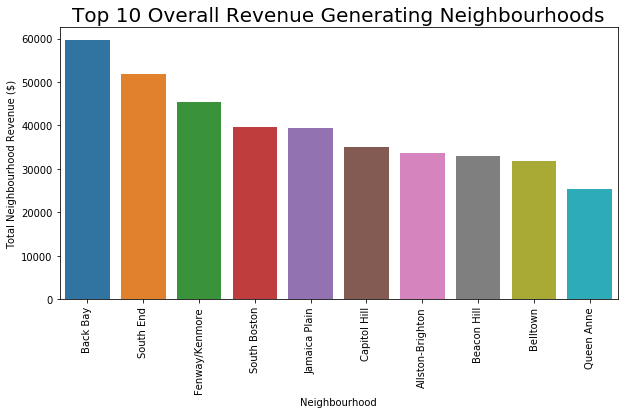

In [43]:
# Visual of the top 10 Overall Revenue Generating Neighbourhoods 
neighbourhood_by_price = df.groupby('neighbourhood').price.sum().sort_values(ascending=False)
neighbourhood_by_price = neighbourhood_by_price
plt.figure(figsize=(10,5))
sns.barplot(neighbourhood_by_price[:10].index, neighbourhood_by_price[:10].values)
plt.title('Top 10 Overall Revenue Generating Neighbourhoods', fontsize=20)
plt.ylabel('Total Neighbourhood Revenue ($)', fontsize=10)
plt.xlabel('Neighbourhood', fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [44]:
mlb_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 3584
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0                                               5541 non-null   int64
 1   24-Hour Check-in                            5541 non-null   int64
 2   Air Conditioning                            5541 non-null   int64
 3   Breakfast                                   5541 non-null   int64
 4   Buzzer/Wireless Intercom                    5541 non-null   int64
 5   Cable TV                                    5541 non-null   int64
 6   Carbon Monoxide Detector                    5541 non-null   int64
 7   Cat(s)                                      5541 non-null   int64
 8   Dog(s)                                      5541 non-null   int64
 9   Doorman                                     5541 non-null   int64
 10  Dryer                               

In [45]:
df=pd.concat([df, mlb_amenities], axis=1, sort=False).drop(
    'amenities', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 3584
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   host_response_rate                          5541 non-null   int64  
 1   host_total_listings_count                   5541 non-null   float64
 2   neighbourhood                               5541 non-null   object 
 3   beds                                        5541 non-null   float64
 4   bedrooms                                    5541 non-null   float64
 5   minimum_nights                              5541 non-null   int64  
 6   maximum_nights                              5541 non-null   int64  
 7   number_of_reviews                           5541 non-null   int64  
 8   price                                       5541 non-null   float64
 9   state                                       5541 non-null   object 
 10              

In [46]:
# Dropping empty column
df.drop('', axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 3584
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   host_response_rate                          5541 non-null   int64  
 1   host_total_listings_count                   5541 non-null   float64
 2   neighbourhood                               5541 non-null   object 
 3   beds                                        5541 non-null   float64
 4   bedrooms                                    5541 non-null   float64
 5   minimum_nights                              5541 non-null   int64  
 6   maximum_nights                              5541 non-null   int64  
 7   number_of_reviews                           5541 non-null   int64  
 8   price                                       5541 non-null   float64
 9   state                                       5541 non-null   object 
 10  24-Hour Chec

## Visualizing the Data

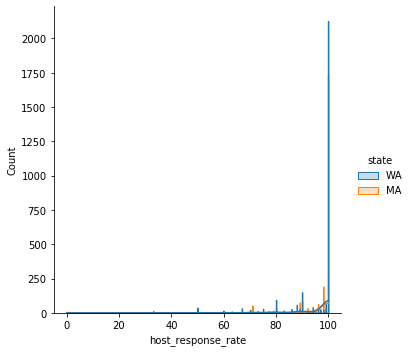

In [48]:
sns.displot(df, x="host_response_rate", hue="state", element="step", kde=True)

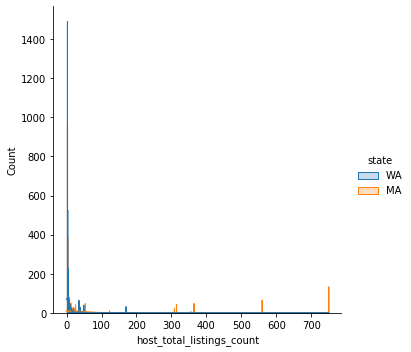

In [49]:
sns.displot(df, x="host_total_listings_count", hue="state", element="step", kde=True)

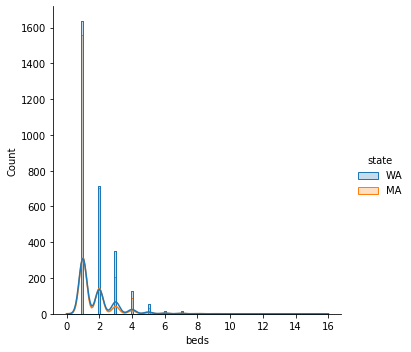

In [50]:
sns.displot(df, x="beds", hue="state", element="step", kde=True)

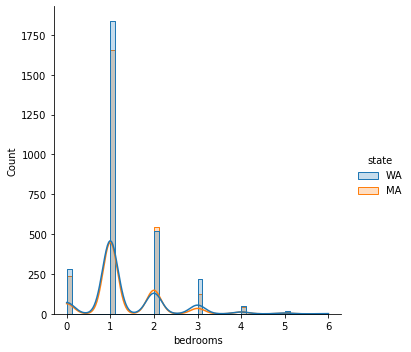

In [51]:
sns.displot(df, x="bedrooms", hue="state", element="step", kde=True)

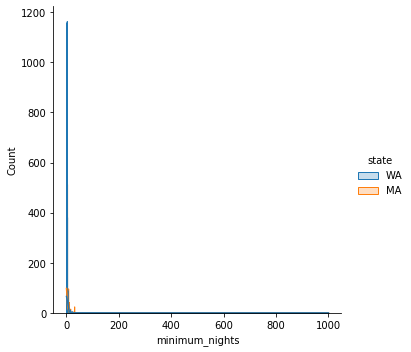

In [52]:
sns.displot(df, x="minimum_nights", hue="state", element="step", kde=True)

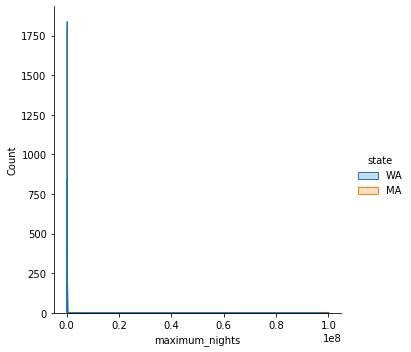

In [53]:
sns.displot(df, x="maximum_nights", hue="state", element="step", kde=True)

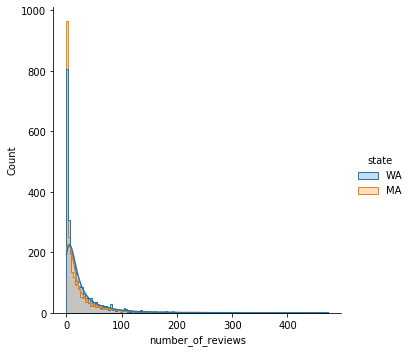

In [54]:
sns.displot(df, x='number_of_reviews', hue='state', element="step", kde=True)

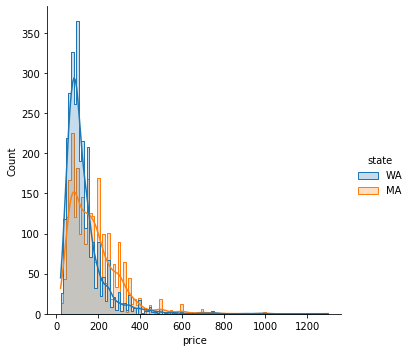

In [55]:
sns.displot(df, x="price", hue="state", element="step", kde=True)

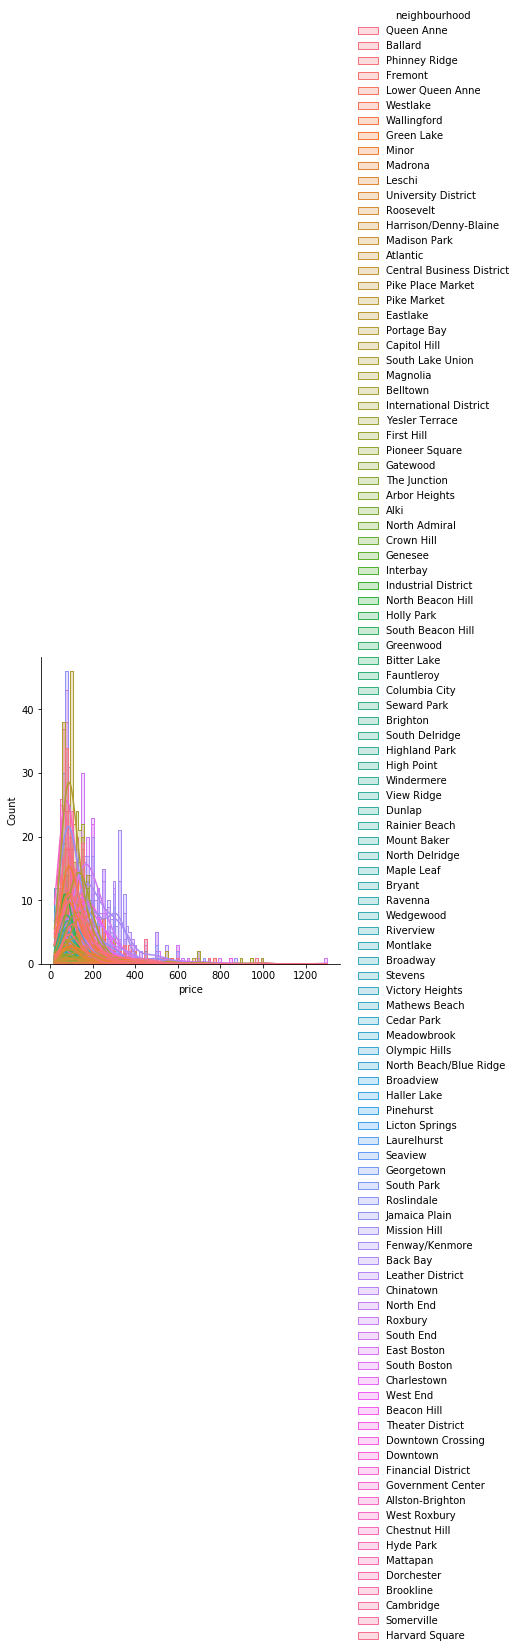

In [56]:
sns.displot(df, x="price", hue="neighbourhood", element="step", kde=True)

### Creating numerical and categorical DF

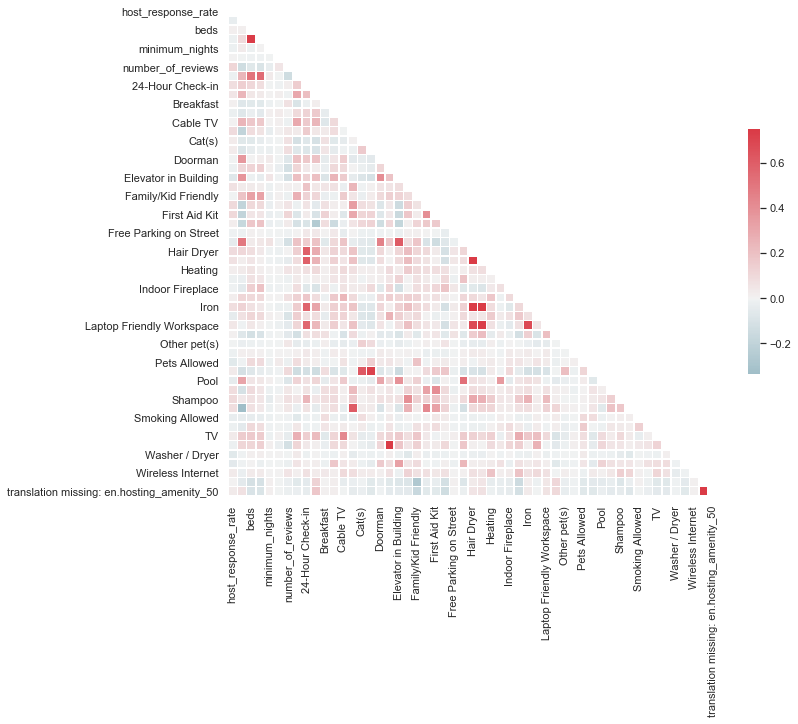

In [57]:
#Heatmap to Visualize Correlations
sns.set(style="white")
corr = df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 3584
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   host_response_rate                          5541 non-null   int64  
 1   host_total_listings_count                   5541 non-null   float64
 2   neighbourhood                               5541 non-null   object 
 3   beds                                        5541 non-null   float64
 4   bedrooms                                    5541 non-null   float64
 5   minimum_nights                              5541 non-null   int64  
 6   maximum_nights                              5541 non-null   int64  
 7   number_of_reviews                           5541 non-null   int64  
 8   price                                       5541 non-null   float64
 9   state                                       5541 non-null   object 
 10  24-Hour Chec

In [59]:
df.columns

Index(['host_response_rate', 'host_total_listings_count', 'neighbourhood',
       'beds', 'bedrooms', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'price', 'state', '24-Hour Check-in',
       'Air Conditioning', 'Breakfast', 'Buzzer/Wireless Intercom', 'Cable TV',
       'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer',
       'Elevator in Building', 'Essentials', 'Family/Kid Friendly',
       'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises',
       'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers', 'Heating',
       'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen',
       'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)',
       'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Intern

In [60]:
num_df = df.drop(['neighbourhood','state', 'price'], axis=1)
num_df

,host_response_rate,host_total_listings_count,beds,bedrooms,minimum_nights,maximum_nights,number_of_reviews,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,96,3.0,1.0,1.0,1,365,207,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,98,6.0,1.0,1.0,2,90,43,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
2,67,2.0,7.0,5.0,4,30,20,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
4,100,2.0,3.0,3.0,1,1125,38,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
6,100,1.0,1.0,1.0,3,14,58,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,96,28.0,1.0,1.0,2,1125,6,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0
3576,100,1.0,1.0,1.0,2,1125,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3580,96,28.0,1.0,1.0,2,1125,4,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
3583,100,4.0,1.0,1.0,1,13,2,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [61]:
cat_df = df.drop(['host_response_rate','host_total_listings_count','beds',
                  'bedrooms', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 
                  'price', '24-Hour Check-in', 'Air Conditioning', 
                  'Breakfast', 'Buzzer/Wireless Intercom', 'Cable TV',
                  'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer',
                  'Elevator in Building', 'Essentials', 'Family/Kid Friendly',
                  'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises',
                  'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers', 'Heating',
                  'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen',
                  'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Other pet(s)',
                  'Paid Parking Off Premises', 'Pets Allowed','Pets live on this property', 
                  'Pool', 'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed', 
                  'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer', 
                  'Wheelchair Accessible', 'Wireless Internet', 
                  'translation missing: en.hosting_amenity_49', 
                  'translation missing: en.hosting_amenity_50'], axis=1)
cat_df

,neighbourhood,state
0,Queen Anne,WA
1,Queen Anne,WA
2,Queen Anne,WA
4,Queen Anne,WA
6,Queen Anne,WA
...,...,...
3575,Somerville,MA
3576,Cambridge,MA
3580,Somerville,MA
3583,Somerville,MA


In [62]:
cat_df_dummies = pd.get_dummies(cat_df, drop_first=True)
cat_df_dummies

,neighbourhood_Allston-Brighton,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Back Bay,neighbourhood_Ballard,neighbourhood_Beacon Hill,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Brookline,neighbourhood_Bryant,neighbourhood_Cambridge,neighbourhood_Capitol Hill,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_Dunlap,neighbourhood_East Boston,neighbourhood_Eastlake,neighbourhood_Fauntleroy,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Government Center,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_Harvard Square,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Hyde Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Jamaica Plain,neighbourhood_Laurelhurst,neighbourhood_Leather District,neighbourhood_Leschi,neighbourhood_Licton Springs,neighbourhood_Lower Queen Anne,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Magnolia,neighbourhood_Maple Leaf,neighbourhood_Mathews Beach,neighbourhood_Mattapan,neighbourhood_Meadowbrook,neighbourhood_Minor,neighbourhood_Mission Hill,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North Delridge,neighbourhood_North End,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike Market,neighbourhood_Pike Place Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Queen Anne,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_Somerville,neighbourhood_South Beacon Hill,neighbourhood_South Boston,neighbourhood_South Delridge,neighbourhood_South End,neighbourhood_South Lake Union,neighbourhood_South Park,neighbourhood_Stevens,neighbourhood_The Junction,neighbourhood_Theater District,neighbourhood_University District,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgewood,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_Westlake,neighbourhood_Windermere,neighbourhood_Yesler Terrace,state_WA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### Establish Target/Features

In [63]:
features = pd.concat([num_df, cat_df_dummies], axis=1)
features.head()

,host_response_rate,host_total_listings_count,beds,bedrooms,minimum_nights,maximum_nights,number_of_reviews,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,neighbourhood_Allston-Brighton,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Back Bay,neighbourhood_Ballard,neighbourhood_Beacon Hill,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Brookline,neighbourhood_Bryant,neighbourhood_Cambridge,neighbourhood_Capitol Hill,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_Dunlap,neighbourhood_East Boston,neighbourhood_Eastlake,neighbourhood_Fauntleroy,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Government Center,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_Harvard Square,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Hyde Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Jamaica Plain,neighbourhood_Laurelhurst,neighbourhood_Leather District,neighbourhood_Leschi,neighbourhood_Licton Springs,neighbourhood_Lower Queen Anne,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Magnolia,neighbourhood_Maple Leaf,neighbourhood_Mathews Beach,neighbourhood_Mattapan,neighbourhood_Meadowbrook,neighbourhood_Minor,neighbourhood_Mission Hill,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North Delridge,neighbourhood_North End,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike Market,neighbourhood_Pike Place Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Queen Anne,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_Somerville,neighbourhood_South Beacon Hill,neighbourhood_South Boston,neighbourhood_South Delridge,neighbourhood_South End,neighbourhood_South Lake Union,neighbourhood_South Park,neighbourhood_Stevens,neighbourhood_The Junction,neighbourhood_Theater District,neighbourhood_University District,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgewood,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_Westlake,neighbourhood_Windermere,neighbourhood_Yesler Terrace,state_WA
0,96,3.0,1.0,1.0,1,365,207,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,98,6.0,1.0,1.0,2,90,43,0,0,0,1,0

In [64]:
target = df['price']

In [65]:
print(target.shape)
print(features.shape)

(5541,)
(5541, 160)


### Train Test Split

In [67]:
# Grid Search Lasso Model
param_grid = {'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
las=Lasso()
grid_search=GridSearchCV(las,param_grid,cv=5,scoring='r2',return_train_score=True)
grid_search.fit(features,target)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1]},
             return_train_score=True, scoring='r2')

In [68]:
# Best Parameter
print(grid_search.best_params_)
print(grid_search.score(features,target))

{'alpha': 1}
0.5154866466254495


In [69]:
# Make alpha=1 Lasso Model
las1=Lasso(alpha=1)
las1.fit(features,target)
las1.coef_

array([-4.03055833e-02,  4.99328491e-02,  2.05276948e+01,  4.67769078e+01,
        1.31503807e-01, -8.83020539e-08, -1.33767716e-01, -0.00000000e+00,
        2.02959512e+01, -0.00000000e+00,  5.42630450e+00,  1.19276053e+01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  8.77397573e+00,
        0.00000000e+00,  2.31270436e+01, -0.00000000e+00,  2.12523527e+00,
       -0.00000000e+00, -0.00000000e+00, -1.77258790e+01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.86391745e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.28935266e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.00927927e+01,  

In [70]:
# Select features by Lasso
model=SelectFromModel(las1,prefit=True)
X_new=model.transform(features)
print(X_new.shape)
model.get_support()

(5541, 21)


array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [71]:
X=features.iloc[:,model.get_support()]
y=target

In [72]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# GridSearch Parameters
param_grid = {'n_estimators': [100, 250, 400],
              'max_leaf_nodes':range(100,1001,100)
              }

In [73]:
# Set Random Forest GridSearchCV Engine
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_leaf_nodes': range(100, 1001, 100),
                         'n_estimators': [100, 250, 400]},
             return_train_score=True, scoring='r2')

In [74]:
# Random Forest Model Performance
print(grid_search.best_params_)
print(grid_search.score(X_train,y_train))
print(mtr.r2_score(y_test,grid_search.predict(X_test)))

{'max_leaf_nodes': 300, 'n_estimators': 400}
0.870120861033862
0.5504566722163808


### Question 3 (Seattle & Boston)

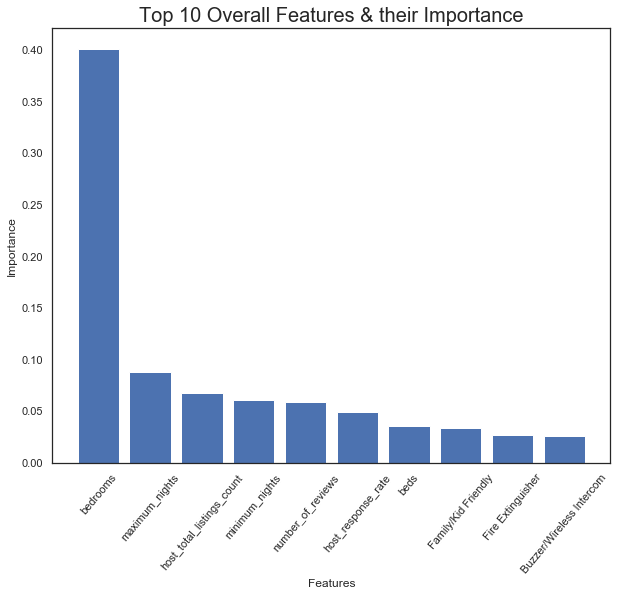

In [80]:
# Collect importance data
feature_importance = grid_search.best_estimator_.feature_importances_
feature = sorted(zip(feature_importance, features.columns), reverse=True)
attribute = []
coefficient = []
for i in range(10):
    attribute.append(feature[i][1])
    coefficient.append(feature[i][0])

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.bar(attribute[:10], height=coefficient[:10])
plt.title('Top 10 Overall Features & their Importance', fontsize=20)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=50)
plt.show()